# 呼び出し方

ridge = RidgeRegression(basis=phi, coef=0.0)

ridge = RidgeRegression(basis_type="poly", max_degree=3, coef=0.01)


ridge_fit=ridge(X,Y)

ridge_fit_predict=ridge_fit(X_0)

In [2]:
func1(3)

TypeError: func1() takes exactly 2 arguments (1 given)

# やること

# 関数作成
## データセット(X,t)を作る。
## 基底関数$\phi_0,...,\phi_{M-1}$を作る。
e.g. $\phi_0(x)=1, \phi_1(x)=x, \phi_2(x)=x^2,\ldots$
## $\Phi$を計算する
## $w$を計算する

# プロット
1. $(X,t)$ をプロット
2. $(X,Y_{predicted} =w \phi(X))$をプロット

# Cross-Validation

## (X,t)をK分割する。
## それぞれの分割kについて以下をやる。
    ### k番目以外を使って関数を作る。
    ### k番目を使って

3.2乗誤差 $|\omega \phi(x)-t|^2$とRMS(Root mean squre) $\sqrt{ \sum_n |\omega \phi(x_n)-t_n|^2 /N_k}$を計算して評価.

In [1]:
%matplotlib inline
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import time

# データセット生成

In [2]:
xy_min = -1
xy_max = 1
n_division = 10#100#10

x = np.linspace(xy_min, xy_max, n_division+1)

#Ｘは(n_division+1)^2個の点の集まり。
#X[0]はx座標の集まり. X[1]はy座標の集まり。
X=np.meshgrid(x,x)
# t=np.sin(X[0])+3*np.cos(X[1])+X[0]*X[1]+np.sin(X[1])**2 *np.cos(X[0])*X[1]**(5)
t=X[0]**6*X[1]**3

num_data=X[0].size
tuple_data_shape=X[0].shape

In [3]:
#ノイズのあるデータの生成

#正規分布にしたがうランダムノイズを生成する。最小二乗法の前提：誤差は正規分布
standard_deviation =0.05; .1 #0.8 #0.1
mean = .0
normal_random_generator = np.random.normal

t_noised=t+ normal_random_generator(mean, standard_deviation,tuple_data_shape)

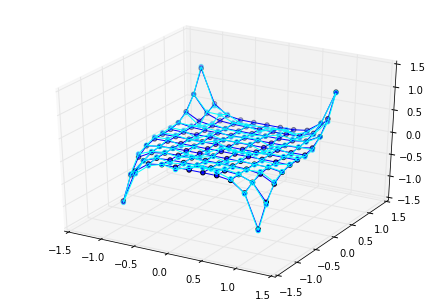

In [4]:
#ノイズの無し／有りデータの表示

fig = plt.figure()
ax = Axes3D(fig)
ax.plot_wireframe(X[0],X[1],t) #<---ここでplot
ax.scatter(X[0],X[1],t) #<---ここでplot

ax.scatter(X[0],X[1],t_noised,color='cyan') #<---ここでplot
ax.plot_wireframe(X[0],X[1],t_noised,color='cyan') #<---ここでplot

In [5]:
#グリッドデータを点列データとする

x_array=np.reshape(X[0],np.size(X[0]))
y_array=np.reshape(X[1],np.size(X[1]))
t_array=np.reshape(t,np.size(t))
t_noised_array=np.reshape(t_noised,np.size(t))

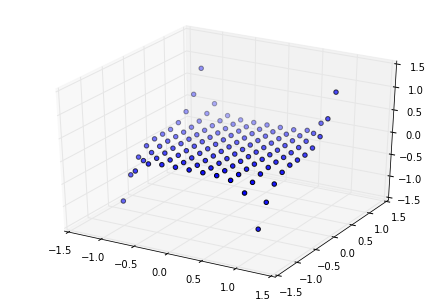

In [6]:
#点列データの表示（上と同様、wireframe は繋がる）

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(x_array,y_array,t_array) #<---ここでplot

# 基底関数の生成

In [7]:
phi_00 =lambda a,b : np.ones(a.shape)
phi_10 =lambda a,b : a
phi_01 =lambda a,b : b
phi_20 =lambda a,b : a**2
phi_11 =lambda a,b : a*b
phi_02 =lambda a,b : b**2
phi_05 =lambda a,b : b**5
phi_sin_x= lambda a,b: np.sin(a)
phi_sin_y= lambda a,b: np.sin(b)
phi_cos_x= lambda a,b: np.cos(a)
phi_cos_y= lambda a,b: np.cos(b)
phi_05_sin_y2_cos_x = lambda a,b:b**5* np.sin(a)**2 *np.cos(b)

phi = [phi_00, phi_10,phi_01,phi_20,phi_11,phi_02]
num_func=len(phi)

## 基底関数の一般化

def: get_basis_of_polynomials(max_degree)
というような関数を作りたい。

そのために
def: get_polynomials_of_a_degree(degree)
があればよさそう。


get_polynomials_of_a_degree(degree)について考える。

degree=iのとき i+1個の関数ができる。

$\phi(x,y)=x^{k} y^{i-k}$みたいなのがi+1個ある。

k=0,...,iまで動かしていって$\phi(x,y)=x^{k} y^{i-k}$をi+1個つくっていけばいい。

まずは def: make_a_polynomial(a,b) -> $\phi(x,y)=x^{a} y^{b}$ みたいな関数をつくればよい。

make_a_polynominal(a,b)を呼び出す時に a = k、b = i-k とする for k=0,1,...,i for each i .

-----------------------------------

基底関数のリストphiにできた関数をどんどん足していけばいい。


In [8]:
#Φ(x,y) = x^k*y^i-k　を生成

def make_a_polynomial(a,b):
#     def phi (x,y):
#         return x**a*y**b;
#     return phi
    return lambda x,y: x**a*y**b

In [9]:
#ある k でのΦを生成

i=5
def get_polynomials_of_a_degree(deg):
    polynomials=[]
    for k in xrange(0,deg+1):
        ph=make_a_polynomial(deg-k,k)
        polynomials.append(ph)
    return polynomials


In [10]:
#k=0,...,max_degree,まで動かし、Φ(x,y)=x^k*y^i-kをi+1個生成

def get_polynomial_basis(max_degree):
    polynomials=[]
    for deg in xrange(0,max_degree+1):
        deg_polys=get_polynomials_of_a_degree(deg)
        for poly in deg_polys:
            polynomials.append(poly)
    return polynomials


In [11]:
#基底関数の数の確認

basis=get_polynomial_basis(5)
for ph in basis:
    print ph(2,1)
print len (basis)

num_polys=lambda max_deg: (1+(max_deg+1))/2.0 * (max_deg+1) 
print num_polys(5)

1
2
1
4
2
1
8
4
2
1
16
8
4
2
1
32
16
8
4
2
1
21
21.0


In [12]:
## Φの生成

poly_deg=20
phi= get_polynomial_basis(poly_deg)
num_func=len(phi)
print num_func

231


In [13]:
# 空き

In [14]:
PHI = np.zeros((num_data, num_func))

#関数Φ（行：サンプル数,列：基底関数の個数）の各要素に値を入れる
for i,ph in enumerate(phi):
    PHI[:,i] = np.reshape(ph(X[0],X[1]),num_data)

## トレーニング（ノイズなし）

In [15]:
#重みwを求める

PHI_trans=np.transpose(PHI)


w = np.linalg.inv(PHI_trans.dot(PHI)).dot(np.dot(PHI_trans, t_array))
#np.linalg.inv 逆行列を求める 
#ws = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_array))
#solve:方程式の解
print w
#print ws

[ -2.93288317e-01   2.78479373e+08  -5.95301737e+05  -6.89274278e+05
   1.06053601e+08   1.58765496e+04  -1.01897897e+10  -6.18733520e+05
   7.64695698e+04   2.17850354e+07   2.51950961e+07  -3.85495296e+09
  -3.44672624e+05  -2.24783415e+07  -5.81176570e+05   9.24089940e+10
   1.81629386e+07  -9.49733164e+04   4.45852744e+06  -2.67877748e+06
  -1.97637105e+08  -2.27763951e+08   3.49113055e+10   1.25421866e+07
  -5.09812009e+07   6.99332012e+04   2.16356760e+08   5.27782948e+06
  -3.09170093e+11  -1.64152126e+08   3.02160812e+05  -6.32664062e+02
  -1.00273266e+05  -4.04359990e+07   2.42783001e+07   6.61783430e+08
   7.56552888e+08  -1.16432645e+11  -1.13753201e+08   4.61909800e+08
  -3.31782969e+04   3.87208250e+05  -6.25017906e+05  -7.22946491e+08
  -1.77132048e+07   4.15654189e+11   5.44944089e+08   3.28326550e+06
  -1.87185250e+05   7.24946688e+05   1.90344273e+05   1.87639125e+05
   1.35267438e+08  -8.09631892e+07  -8.91452163e+08  -1.00011440e+09
   1.55360301e+11   3.80671161e+08

## トレーニング（ノイズあり）

In [16]:
PHI_trans=np.transpose(PHI)
#np.transpose 転置


identity=np.identity(len(PHI_trans.dot(PHI)))

regularization_coef=1e-10#1e6#1e-10

w_noise = np.linalg.inv(PHI_trans.dot(PHI)+regularization_coef*identity).dot(np.dot(PHI_trans, t_noised_array))
#ws_noise = np.linalg.solve( PHI_trans.dot(PHI), np.dot(PHI_trans, t_noised_array))
print w_noise
#print ws_noise

TargetMatrix=PHI_trans.dot(PHI)
print TargetMatrix.shape
print np.linalg.matrix_rank(PHI_trans.dot(PHI))

print np.linalg.matrix_rank(PHI_trans.dot(PHI)+regularization_coef*identity)

[ -1.93995313e-02  -2.20464500e-01  -2.35472560e-01  -1.20865460e-01
  -9.95314444e-01   1.92226003e+00   7.88491666e-01   8.09518430e+00
   1.16683549e+01   2.82047844e+00   1.82430680e+00  -4.59964099e+00
  -2.39041508e+01   1.45693131e+01  -1.73179012e+01   3.64134789e-01
  -7.96813879e+01  -7.34888410e+01  -4.84837689e+01  -7.90909748e+01
  -7.33116531e+00  -4.44486792e+00   3.25286849e+01   1.29786716e+02
  -6.17951516e+01   1.27462418e+02  -3.89699246e+01   3.92186785e+01
  -9.93916750e-01   2.06453854e+02   1.38393845e+02   4.38261850e+02
   4.28928009e+02   7.32653904e+01   1.54314949e+02   1.47600555e+00
   8.87564480e-01  -1.37396173e+01  -2.98124274e+02  -7.28210475e+00
  -4.52421359e+02   2.84133047e+02  -1.65302087e+02   8.65282834e+00
  -6.69934487e+00  -9.58169937e-01  -5.72194290e+01  -2.69568894e+01
  -1.18772937e+03  -8.07055116e+02  -5.24856197e+02  -6.57114347e+02
   5.19245529e+00  -2.51496318e+01   4.30587959e+00   2.63399211e+00
  -2.56747246e+01   7.94830037e+01

# 予測

In [17]:
x_sample=(X[0][0,0],X[1][0,0])
y_sample=sum ([ phi[i](*x_sample) for i in xrange(len(phi))])

Y_predicted_array=PHI.dot(w)
Y_predicted=Y_predicted_array.reshape(tuple_data_shape)

Y_predicted_from_noise_array=PHI.dot(w_noise)
Y_predicted_noise=Y_predicted_from_noise_array.reshape(tuple_data_shape)

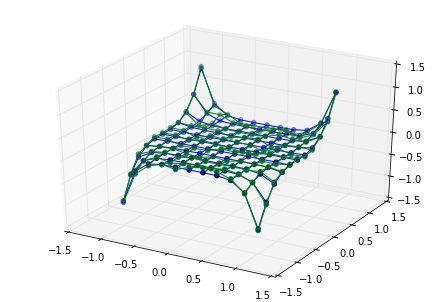

In [18]:
#予測データの表示
#t:ground truth, t_noised:ground truth with noise generated from a normal distribution
#Y_predicted:predicted values by a function trained using t
#Y_predicted_noise:predicted values by a function trained using t_noised

fig = plt.figure()
ax = Axes3D(fig)

ax.plot_wireframe(X[0],X[1],t)
ax.scatter(X[0],X[1],t)

# ax.scatter(X[0],X[1],t_noised,color='cyan')
# ax.plot_wireframe(X[0],X[1],t_noised,color='cyan')

# ax.scatter(X[0],X[1],Y_predicted,color='red')
# ax.plot_wireframe(X[0],X[1],Y_predicted,color='red')

ax.scatter(X[0],X[1],Y_predicted_noise,color='green')
ax.plot_wireframe(X[0],X[1],Y_predicted_noise,color='green')